In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [39]:
full_acc = (np.load(f"../ckpts/gsm8k_fft_rand0+/test_answer_types_gsm8k.npy")==0).mean()
full_acc_full = (np.load(f"../ckpts/gsm8k_fft_rand0+/test_answer_types_gsm8k.npy")==0).mean(axis=-1)

In [40]:
train_types = ["easy", "rand", "hard"]

traincorrects = [20, 40, 60]

accs_all = []
accs_all_full = []
for train_type in train_types:
    accs = []
    accs_full = []
    accs.append(full_acc)
    accs_full.append(full_acc_full)
    for traincorrect in traincorrects:
        accs.append((np.load(f"../ckpts/gsm8k_fft_{train_type}{str(traincorrect)}+/test_answer_types_gsm8k.npy")==0).mean())
        accs_full.append((np.load(f"../ckpts/gsm8k_fft_{train_type}{str(traincorrect)}+/test_answer_types_gsm8k.npy")==0).mean(axis=-1))
    accs_all.append(accs)
    accs_all_full.append(accs_full)
accs_all = np.array(accs_all)
accs_all_full = np.array(accs_all_full)

In [21]:
num_train_points = [7473, 4779, 2891, 1462]

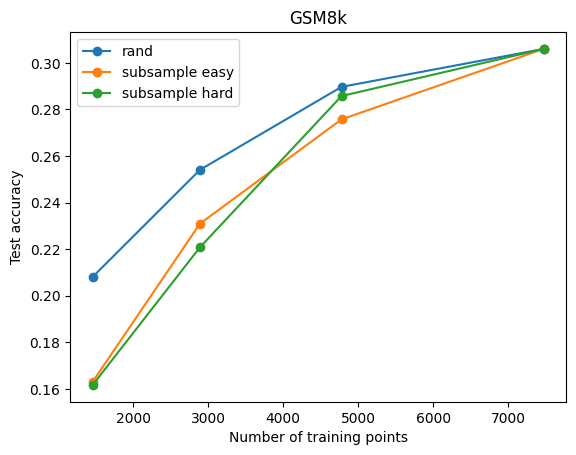

In [24]:
plt.plot(num_train_points, accs_all[1], "o-", label="rand")
plt.plot(num_train_points, accs_all[0], "o-", label="subsample easy")
plt.plot(num_train_points, accs_all[2], "o-", label="subsample hard")

plt.xlabel("Number of training points")
plt.ylabel("Test accuracy")
plt.title("GSM8k")
plt.legend()

In [26]:
base_accs = (np.load("../ckpts/llama7B_GSM8k_test_answer_types_all100.npy")==0).mean(axis=-1)


(array([842., 184.,  97.,  58.,  41.,  31.,  26.,  23.,  12.,   5.]),
 array([0.   , 0.081, 0.162, 0.243, 0.324, 0.405, 0.486, 0.567, 0.648,
        0.729, 0.81 ]),
 <BarContainer object of 10 artists>)

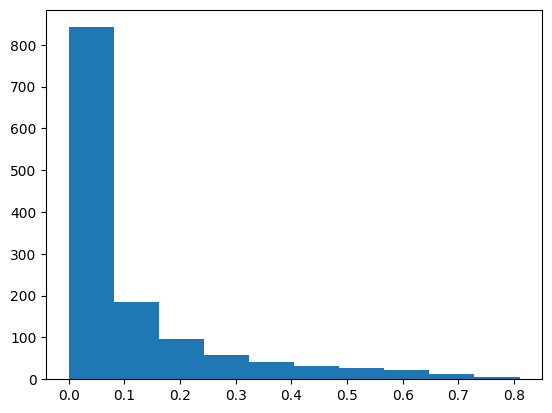

In [28]:
plt.hist(base_accs)

In [41]:
accs_all_full.shape

(3, 4, 1319)

In [59]:
hard_test_idxs = np.where(base_accs<0.03)[0]
# easy rand hard
accs_all_full[:, 2, hard_test_idxs].mean(axis=-1)

array([0.06502947, 0.07779961, 0.08074656])

In [64]:
easy_test_idxs = np.where(base_accs>=0.3)[0]
# easy rand hard
accs_all_full[:, 2, easy_test_idxs].mean(axis=-1)

array([0.68544304, 0.67278481, 0.56329114])

In [65]:
medium_test_idxs = np.where((base_accs<0.3)*(base_accs>=0.03))[0]
# easy rand hard
accs_all_full[:, 2, medium_test_idxs].mean(axis=-1)

array([0.25030675, 0.29018405, 0.24708589])

In [32]:
accs_all[0][hard_test_idxs].mean()

TypeError: only integer scalar arrays can be converted to a scalar index

In [33]:
accs_all.shape

AttributeError: 'list' object has no attribute 'shape'